## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Perform multiple linear regression to predict the price of a house. Make sure to check for assumptions.

### b) Defining the Metric for Success

The project will be a success when we are able to create a multiple linear regression model that fits at least 80% of the training data.

### c) Understanding the Context 

Knightly Frankly is an estate agency, residential and commercial property consultancy
founded in London by John Knight, Howard Frank and William Rutley in 1896.
Together with its New York-based affiliate Newmark, Knightly Frankly is one of the
world's largest global property consultancies.
As a data scientist working for the agency, you have been put to task to help develop a
solution that would allow the agency to price its properties.

### d) Recording the Experimental Design

1. Load datasets and libraries
2. Clean data
3. Perform univariate and bivariate analysis
4. Check that the assumptions of multiple linear regression aren't violated
5. Perform multiple linear regression
6. Summarize findings
7. Provide recommendations
8. Challenge the solution

### e) Data Relevance

The dataset provided is appropriate and relevant to the research question.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)

In [ ]:
house = pd.read_csv('house_data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# check dataset shape
house.shape

(21613, 21)

In [ ]:
# chekc data types
house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We will drop the 'id' and 'date' variables and then drop any duplicated values so that it will be easier to work with the dataset.

In [ ]:
house = house.drop(columns = ['id', 'date'])

In [ ]:
# dropping duplicates, if any
house.drop_duplicates(inplace = True)
house.shape

(21608, 19)

In [ ]:
# check for missing data
house.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values.

## <font color='#2F4F4F'>3. Data Analysis</font>

For our analysis, we will check the assumptions of multiple linear regression which include:
1. There must be a linear relationship between the independent variables and the target variable.
2. Few or no outliers.
3. Little to no multicollinearity.
4. Homoscedasticity - variance of error terms must be similar across the independent variables.
5. All residuals must be normally distributed. 

### 3.1 Checking linearity

In [ ]:
# create list to store column names to test against 'price'
house_columns = house.columns.to_list()
house_columns.remove('price')
len(house_columns)

18

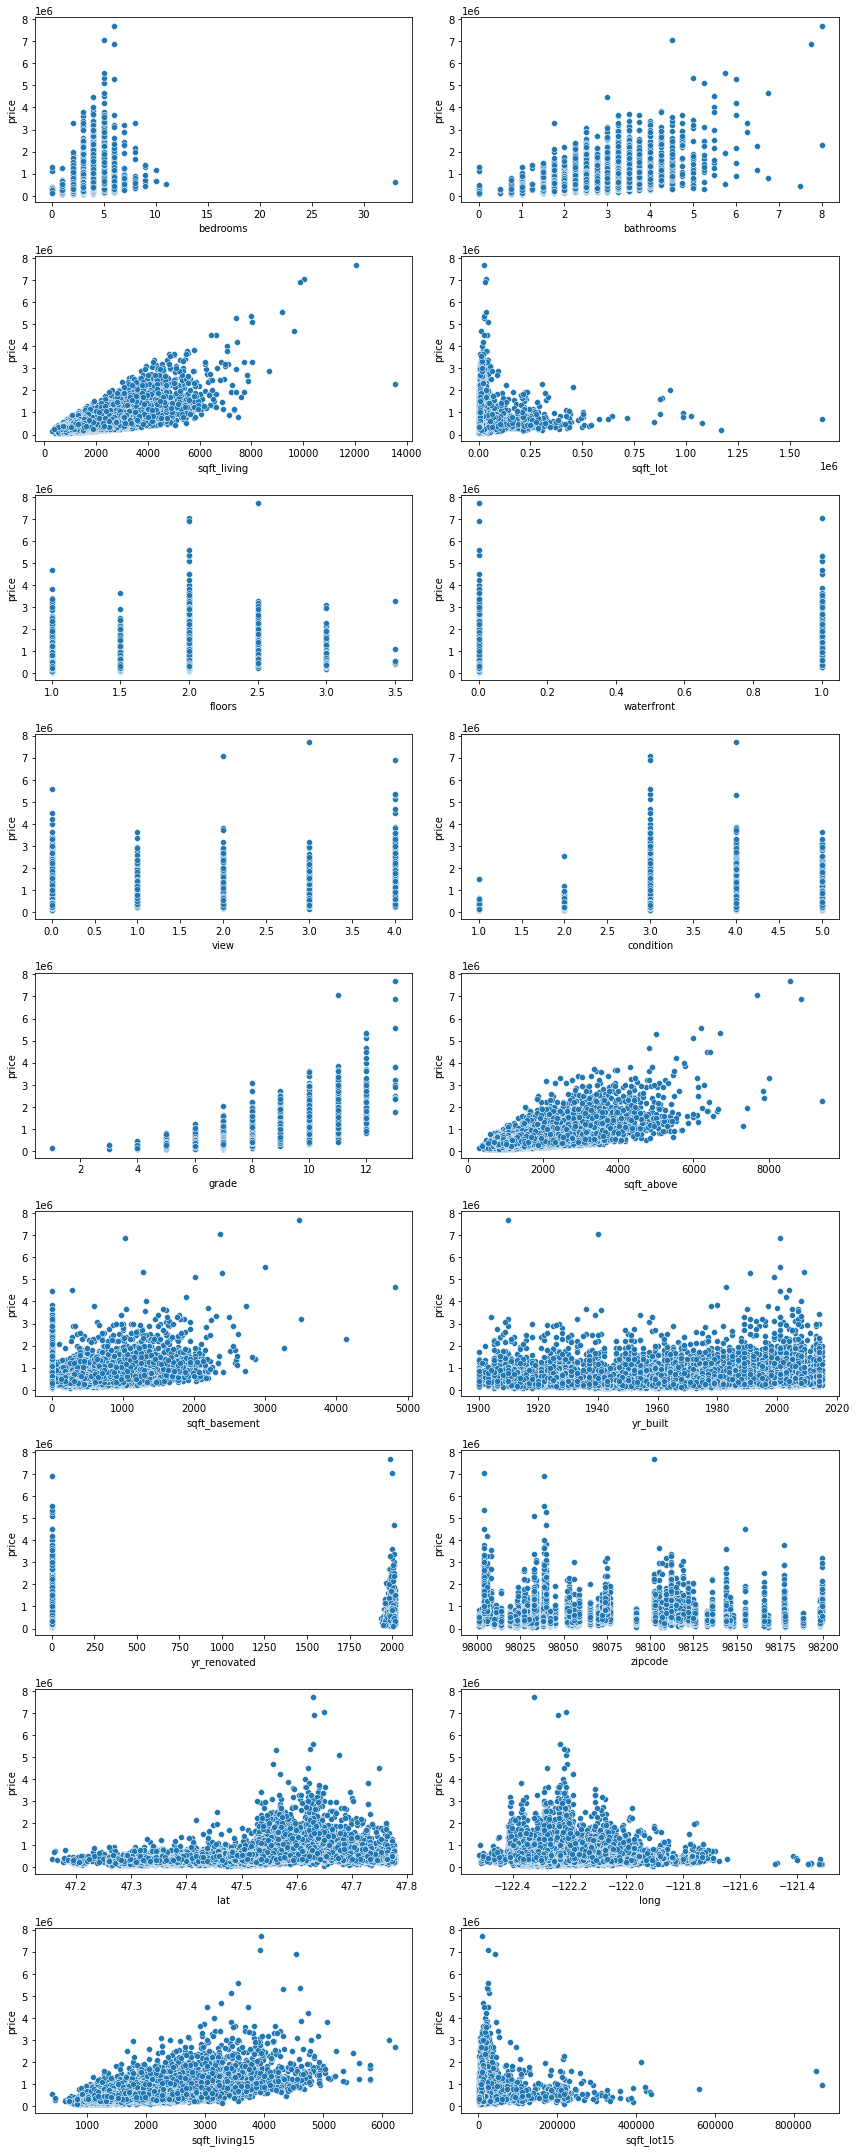

In [ ]:
# creating scatterplots to observe the relationship between price and the variables
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(nrows = 9, ncols = 2, figsize = (12, 30))

for ax, col in zip(axes.flatten(), house_columns):
    sns.scatterplot(house[col], house['price'], ax = ax)
    plt.xlabel("{}".format(col))
    plt.ylabel("price")
    
plt.tight_layout()

What have you noticed? What will you do next?

# **Observation**



*  sqft_living, sqft_above, and sqft_living15 are skewed to the right, potentially use log transformation with skewed data to conform to normality

*  sqft_lot, sqft_lot15, sqft_basement, and yr_renovated have a lot of zero values, maybe create a discrete binary variable for some of them

* in the case of yr_renovated, with such disparate values between no renovations as 0 values and the years having values around 2000, best to consider this as a discrete variable rather than continuous

*   sqft_living and sqft_above show the strongest correlation with price
scatterplots allow you to identify outliers 

*   hard to see relationship of lat, long, and yr_built to price

* There might be a clearer linear relationship between price and specific condition values, which we can explore more effectively by one-hot encoding the variable. 















### 3.2 Checking for outliers

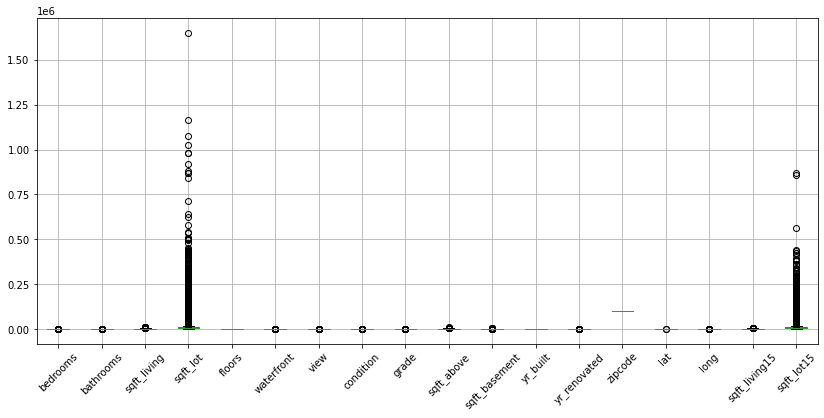

In [ ]:
# create a boxplot to visualize the outliers 
# looking for outliers
num_cols = house.columns.to_list()
num_cols.remove('price')

plt.figure(figsize = (14, 6))
house.boxplot(num_cols)
plt.xticks(rotation = 45)
plt.show()


What observations can you make? What actions are you going to take next?

## Observations


*  Sqft Living & Sqft lot have the most outliers
*  This means that our data is not quality for multiple linear regression since this model is sensitive to outliers. 



### 3.3 Checking multicollinearity

In [ ]:
# create a heatmap of the correlations
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160800e+04,21608.000000,21608.000000,21608.000000,2.160800e+04,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000
mean,5.401924e+05,3.370927,2.114738,2079.958950,1.510962e+04,1.494146,0.007544,0.234219,3.409478,7.656655,1788.414846,291.544104,1970.999907,84.330155,98077.942614,47.560050,-122.213894,1986.583164,12770.108340
std,3.673996e+05,0.930103,0.770238,918.505805,4.142491e+04,0.539910,0.086527,0.766169,0.650782,1.175484,828.141155,442.612560,29.371463,401.517026,53.506883,0.138578,0.140830,685.421474,27307.006892
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.218375e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470875,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230500,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


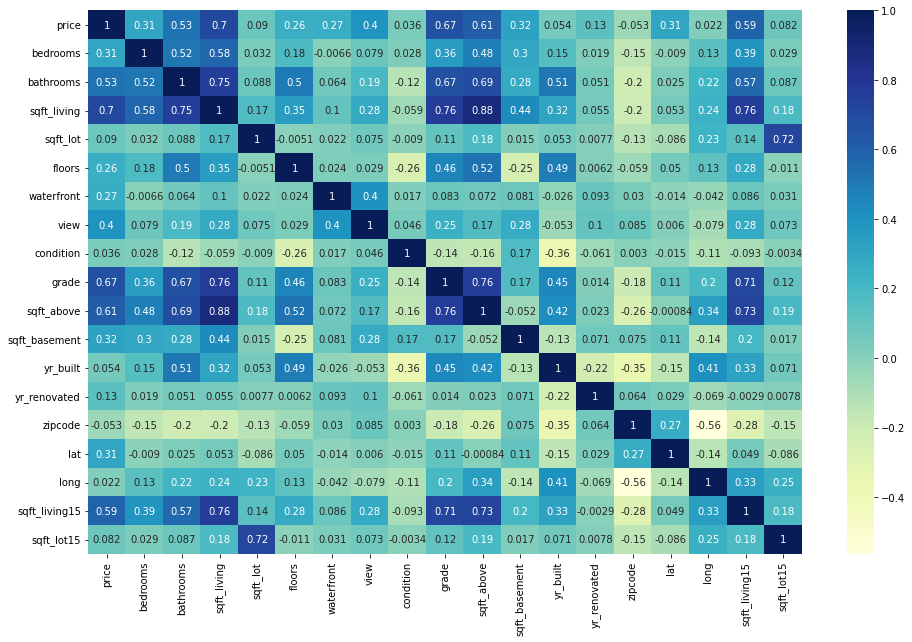

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(house.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
# check VIF scores

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif1=pd.Series([variance_inflation_factor(house.values,i) for i in range(house.shape[1])],index=house.columns)

vif1


price            1.053029e+01
bedrooms         2.365178e+01
bathrooms        2.882134e+01
sqft_living               inf
sqft_lot         2.378519e+00
floors           1.689490e+01
waterfront       1.276280e+00
view             1.595613e+00
condition        3.492973e+01
grade            1.609611e+02
sqft_above                inf
sqft_basement             inf
yr_built         1.021689e+04
yr_renovated     1.196711e+00
zipcode          1.694602e+06
lat              1.592508e+05
long             1.376962e+06
sqft_living15    2.715906e+01
sqft_lot15       2.601896e+00
dtype: float64

What have you noticed? What actions are you going to take next regarding this?

## <font color='#2F4F4F'>4. Data Modeling</font>

In [ ]:
# split into features (X) and label (Y)
X = house.drop(['price'], axis=1)
y= house['price']


In [ ]:
# split into 80-20 train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
# fit regressor to data and make predictions

from sklearn.tree import DecisionTreeRegressor 

# Creating our regressor, We'll just use the decision tree regressor this time
regressor =DecisionTreeRegressor()

# Fitting our data to our regressors 
regressor.fit(X_train, y_train)

#predict
y_pred = regressor.predict(X_test)


In [ ]:
# evaluate RMSE and r-squared scores
from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared:', metrics.r2_score(y_test, y_pred))

Root Mean Squared Error: 179782.53017423503
R Squared: 0.7343917678697836


### 4.1 Test for normality and homoscedasticity

Text(0, 0.5, 'Residuals')

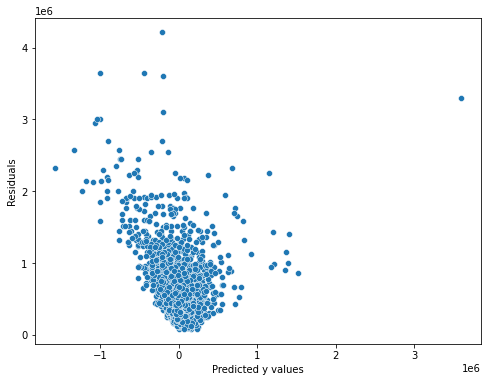

In [ ]:
## create a dataframe of residuals

res = y_test - y_pred

res_df = pd.DataFrame(res)
res_df.head()

# plotting our residuals
plt.figure(figsize=(8,6))
sns.scatterplot(x=res, y=y_pred)
plt.xlabel("Predicted y values")
plt.ylabel("Residuals")




## Observation

Normality of residuals: Not normal.

As we can see, this model violates the  normality assumptions for linear regression. Log-transformation can often help when these assumptions are not met. Let's update the values to their natural logs and re-check the assumptions.

In [ ]:
# fit regressor to data and make predictions

from sklearn.tree import DecisionTreeRegressor 

# Creating our regressor, We'll just use the decision tree regressor this time
regressor =DecisionTreeRegressor()

# Fitting our data to our regressors 
regressor.fit(X_train, y_train)

#predict
y_pred = regressor.predict(X_test)


In [ ]:
import scipy as sp

# using the scipy bartlett function to get our test result and p-value


# computing the critical value of a chi-squared distribution
degree_of_freedom = len(y_pred) - 1
prob = 1 - p_value
critical_value = sp.stats.chi2.ppf(prob, degree_of_freedom)

print("Critical value:", critical_value)

If the test result of our Bartlett test is greater than the critical value of the chi-squared distribution, then we will reject our null value and conclude that the variances in our dataset are not equal, i.e., they are heterogeneous. Otherwise, we will accept that this dataset's variances are homogeneous.

In [ ]:
if (test_result > critical_value):
    print(" The variances are heterogeneous (unequal), and the model needs to be reassessed.")
else:
    print('The variances are homogeneous (equal).')

### 4.2 Boosting

We can try boosting to see if it will improve our model. We will experiment with 3 types of boosting:
- Ada Boosting
- Gradient Boosting
- eXtreme Gradient (XG) Boosting

In [ ]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# creating a list of learning rates to use as hyperparameters
learning_rates = [0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# setting up our Ada booster
for lr in learning_rates:
    ada = AdaBoostRegressor(learning_rate = lr, random_state = 0)
    ada.fit(X_train, y_train)
    ada_predict = ada.predict(X_test)
    print("Ada Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(mean_squared_error(y_test, ada_predict)))
    #print('Ada Boost - Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, ada_boost_y_pred)))
    
print("***************************************************") 

# setting up our Gradient booster
for lr in learning_rates:
    gradient = GradientBoostingRegressor(learning_rate = lr, random_state = 0)
    gradient.fit(X_train, y_train)
    gradient_predict = gradient.predict(X_test)
    print("Gradient Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(mean_squared_error(y_test, gradient_predict)))
    print()

print("***************************************************")

# setting up our XG booster
for lr in learning_rates:
    xgbr = XGBRegressor(learning_rate = lr, random_state = 0)
    xgbr.fit(X_train, y_train)
    xgbr_predict = xgbr.predict(X_test)
    print("XG Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(mean_squared_error(y_test, xgbr_predict)))
    print()

Ada Boosting Regression with Learning Rate: 0.1
RMSE Score: 203462.39842444344
Ada Boosting Regression with Learning Rate: 0.2
RMSE Score: 214570.85263086384
Ada Boosting Regression with Learning Rate: 0.3
RMSE Score: 226992.0524746688
Ada Boosting Regression with Learning Rate: 0.4
RMSE Score: 237242.50639842812
Ada Boosting Regression with Learning Rate: 0.5
RMSE Score: 252003.32398596578
Ada Boosting Regression with Learning Rate: 0.6
RMSE Score: 262521.45939713
Ada Boosting Regression with Learning Rate: 0.7
RMSE Score: 297065.65618053585
Ada Boosting Regression with Learning Rate: 0.8
RMSE Score: 285006.87164279475
Ada Boosting Regression with Learning Rate: 0.9
RMSE Score: 308373.3740209355
***************************************************
Gradient Boosting Regression with Learning Rate: 0.1
RMSE Score: 124911.56443920659

Gradient Boosting Regression with Learning Rate: 0.2
RMSE Score: 120088.84696508915

Gradient Boosting Regression with Learning Rate: 0.3
RMSE Score: 120197.

In [ ]:
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import BaggingRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [ ]:
# Finally, we evaluate the models
# ---  
# NB: The closer the RMSE is to 0, the better the model.
#  
# Lets now train our regressors
# ---
#  

from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import BaggingRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb


# Creating our regressors, We'll just use the decision tree regressor this time
# ---
# 
regressor = DecisionTreeRegressor()

# Then creating our ensemble regressors
# ---

# Bagging Regressors
# ---
bagging_est_regressor = BaggingRegressor()
random_forest_regressor = RandomForestRegressor()

# Boosting Regressors
# ---
ada_boost_regressor = AdaBoostRegressor()
gbm_regressor = GradientBoostingRegressor()
xgboost_regressor = xgb.XGBRegressor(objective ='reg:squarederror') # It requires us to specify the objective function

# Fitting our data to our regressors 
# ---
# Decision Tree Regressor
regressor.fit(X_train, y_train)

# Bagging Regressors
# ---
bagging_est_regressor.fit(X_train, y_train)
random_forest_regressor.fit(X_train, y_train)

# Boosting Regressors
# ---
ada_boost_regressor.fit(X_train, y_train)
gbm_regressor.fit(X_train, y_train)
xgboost_regressor.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror')

In [ ]:
# Making predictions using our models
# ---
#  
y_pred = regressor.predict(X_test)

# Bagging Regressors
# ---
bag_est_y_pred = bagging_est_regressor.predict(X_test)
random_forest_y_pred = random_forest_regressor.predict(X_test)

# Boosting Regressors
# ---
ada_boost_y_pred = ada_boost_regressor.predict(X_test)
gbm_y_pred = gbm_regressor.predict(X_test)
xgboost_y_pred = xgboost_regressor.predict(X_test)

In [ ]:
# Finally, we evaluate the models
# ---  
# NB: The closer the RMSE is to 0, the better the model.
#  
from sklearn.metrics import mean_squared_error

print('Decision Tree - Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Bagging Regressors
# ---
print('Bagging Estimator - Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, bag_est_y_pred)))
print('Random Forest - Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, random_forest_y_pred)))

#*******************************************************************************************************************
# Boosting Regressors
# ---
print('Ada Boost - Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, ada_boost_y_pred)))
print('GBM - Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, gbm_y_pred)))
print('XGBoost - Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, xgboost_y_pred)))

Decision Tree - Root Mean Squared Error: 185049.6180662147
Bagging Estimator - Root Mean Squared Error: 122390.11070321046
Random Forest - Root Mean Squared Error: 117426.95818303066
Ada Boost - Root Mean Squared Error: 354850.7654274664
GBM - Root Mean Squared Error: 124911.56443920659
XGBoost - Root Mean Squared Error: 125834.30401675866


From the above analysis, we see that XG Boosting with a learning rate of 0.1 returned the lowest RMSE score (125,974). Although still higher than 10% of the target variable mean, it is a better score than that of the original linear regression. Also, the r-squared score of XG Boosting is 0.8 which means it fits about 80% of our data, which is much better than for linear regression.

## <font color='#2F4F4F'>5. Summary of Findings</font>

Our dataset met most of the assumptions for multiple linear regression such as normality and homoscedasticity. However, the assumptions on linearity, multicollinearity, and outliers were not fully met, thereby proving to be a poor data for multiple linear regression.

With XG Boosting, the model fit to about 80% of the data, thereby meeting our metric for success.

## <font color='#2F4F4F'>6. Recommendations</font>

I would recommend that Knightly Frankly use XG Boost Regressor rather than Multiple Linear Regression to predict the prices of the houses.

## <font color='#2F4F4F'>7. Challenging your Solution</font>

#### a) Did we have the right question?
Yes.

#### b) Did we have the right data?
Yes.

#### c) What can be done to improve the solution?
Apart from carrying out hyperparameter tuning, we can implement cross validation. Alternatively, we can try out other regression analysis models.